<h1>Lab Experiment-3</h1>
<h2>Cluster Analysis</h2>
<p>CS3103: Machine Learning</p>
Department of Computer Science and Engineering<hr>
August 13, 2025

<h2>Task 1</h2>



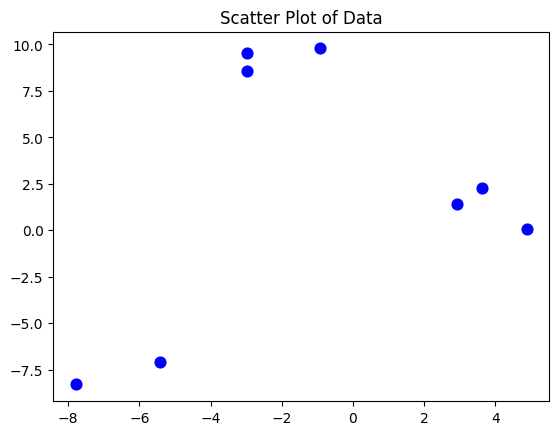

Distance Matrix:
 [[ 0.    9.82 10.05 16.84  2.06 18.49 12.33  1.01]
 [ 9.82  0.    1.13 13.04  8.77 15.56  2.56  9.1 ]
 [10.05  1.13  0.   11.91  9.21 14.45  2.39  9.25]
 [16.84 13.04 11.91  0.   17.47  2.65 12.54 15.84]
 [ 2.06  8.77  9.21 17.47  0.   19.33 11.33  2.39]
 [18.49 15.56 14.45  2.65 19.33  0.   15.17 17.52]
 [12.33  2.56  2.39 12.54 11.33 15.17  0.   11.57]
 [ 1.01  9.1   9.25 15.84  2.39 17.52 11.57  0.  ]]

Linkage: single
Merged clusters (0, 7) with distance 1.01. Number of clusters: 7
Merged clusters (1, 2) with distance 1.13. Number of clusters: 6
Merged clusters (0, 3) with distance 2.06. Number of clusters: 5
Merged clusters (1, 4) with distance 2.39. Number of clusters: 4
Merged clusters (2, 3) with distance 2.65. Number of clusters: 3
Merged clusters (0, 1) with distance 8.77. Number of clusters: 2
Merged clusters (0, 1) with distance 11.91. Number of clusters: 1


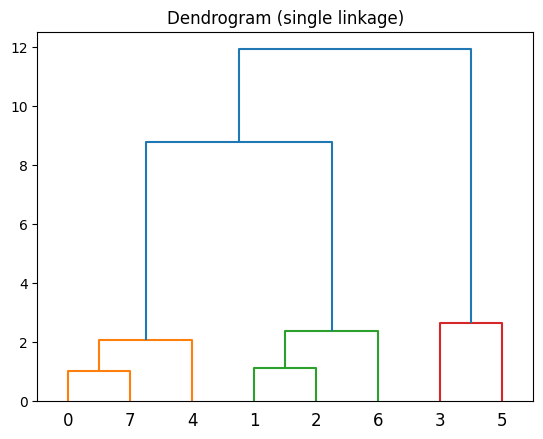


Linkage: complete
Merged clusters (0, 7) with distance 1.01. Number of clusters: 7
Merged clusters (1, 2) with distance 1.13. Number of clusters: 6
Merged clusters (0, 3) with distance 2.39. Number of clusters: 5
Merged clusters (1, 4) with distance 2.56. Number of clusters: 4
Merged clusters (2, 3) with distance 2.65. Number of clusters: 3
Merged clusters (0, 1) with distance 12.33. Number of clusters: 2
Merged clusters (0, 1) with distance 19.33. Number of clusters: 1


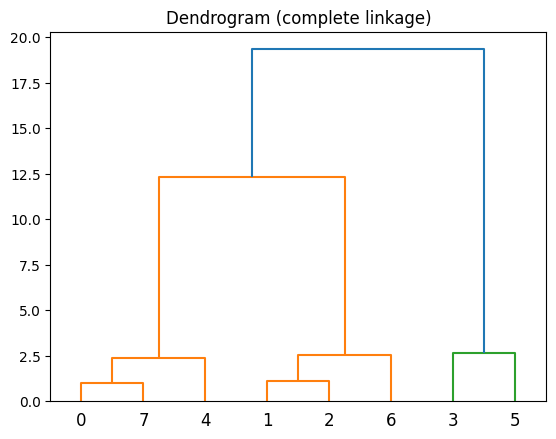


Linkage: average
Merged clusters (0, 7) with distance 1.01. Number of clusters: 7
Merged clusters (1, 2) with distance 1.13. Number of clusters: 6
Merged clusters (0, 3) with distance 2.22. Number of clusters: 5
Merged clusters (1, 4) with distance 2.47. Number of clusters: 4
Merged clusters (2, 3) with distance 2.65. Number of clusters: 3
Merged clusters (0, 1) with distance 10.16. Number of clusters: 2
Merged clusters (0, 1) with distance 15.68. Number of clusters: 1


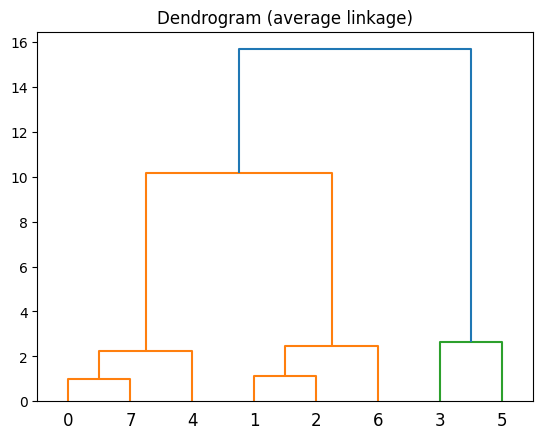


Linkage: centroid
Merged clusters (0, 7) with distance 1.01. Number of clusters: 7
Merged clusters (1, 2) with distance 1.13. Number of clusters: 6
Merged clusters (0, 3) with distance 2.17. Number of clusters: 5
Merged clusters (1, 4) with distance 2.41. Number of clusters: 4
Merged clusters (2, 3) with distance 2.65. Number of clusters: 3
Merged clusters (0, 1) with distance 10.10. Number of clusters: 2
Merged clusters (0, 1) with distance 14.91. Number of clusters: 1


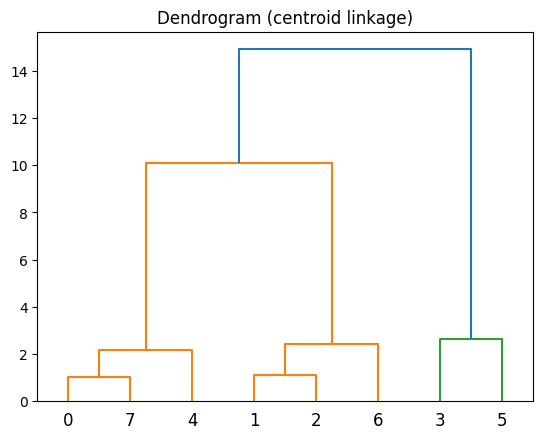

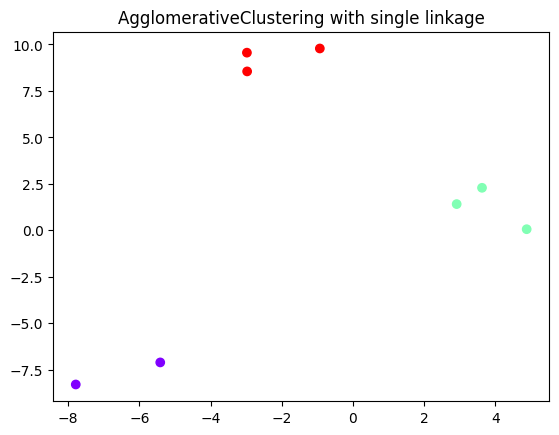

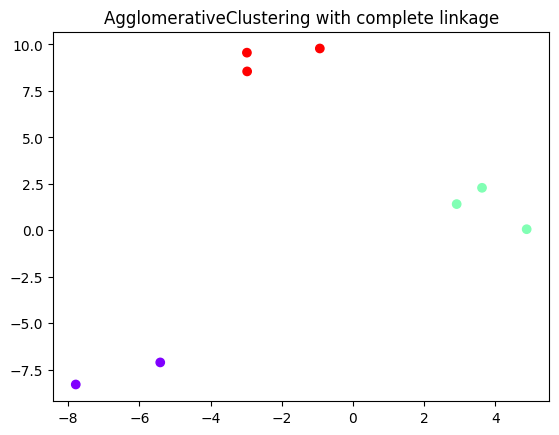

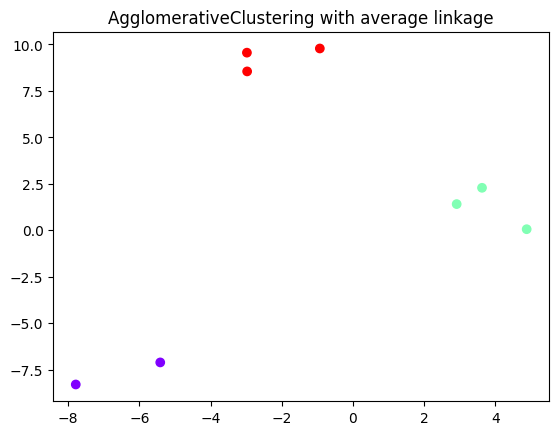

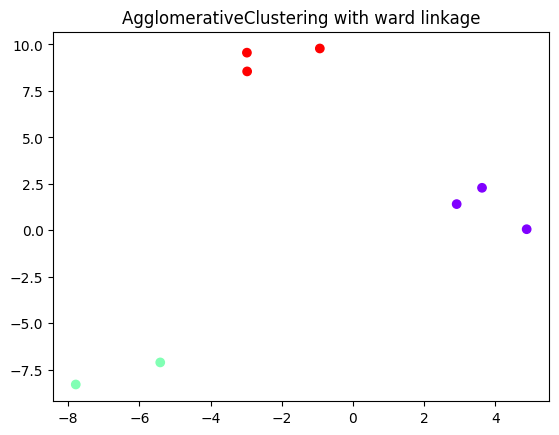

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=8, centers=3, random_state=42, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c='blue', s=60)
plt.title("Scatter Plot of Data")
plt.show()

def single_linkage(A, B, dist_matrix):
    return np.min(dist_matrix[np.ix_(A, B)])

def complete_linkage(A, B, dist_matrix):
    return np.max(dist_matrix[np.ix_(A, B)])

def average_linkage(A, B, dist_matrix):
    return np.mean(dist_matrix[np.ix_(A, B)])

def centroid_linkage(A, B, X):
    muA, muB = np.mean(X[A], axis=0), np.mean(X[B], axis=0)
    return np.linalg.norm(muA - muB)

dist_matrix = pairwise_distances(X, metric='euclidean')
print("Distance Matrix:\n", np.round(dist_matrix, 2))

def hac(X, linkage="single"):
    n = len(X)
    clusters = [[i] for i in range(n)]
    merges = []

    while len(clusters) > 1:
        min_dist = float("inf")
        best_pair = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if linkage == "single":
                    d = single_linkage(clusters[i], clusters[j], dist_matrix)
                elif linkage == "complete":
                    d = complete_linkage(clusters[i], clusters[j], dist_matrix)
                elif linkage == "average":
                    d = average_linkage(clusters[i], clusters[j], dist_matrix)
                elif linkage == "centroid":
                    d = centroid_linkage(clusters[i], clusters[j], X)

                if d < min_dist:
                    min_dist = d
                    best_pair = (i, j)

        i, j = best_pair
        merges.append((clusters[i], clusters[j], min_dist, len(clusters[i]) + len(clusters[j])))
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]

        print(f"Merged clusters {best_pair} with distance {min_dist:.2f}. Number of clusters: {len(clusters)}")

    return merges

# dendrogram
def plot_dendrogram(merges, title):
    from scipy.cluster.hierarchy import dendrogram

    linkage_matrix = []
    cluster_id = len(X)
    id_map = {i: i for i in range(len(X))}

    for a, b, dist, size in merges:
        linkage_matrix.append([id_map[a[0]], id_map[b[0]], dist, size])
        id_map[a[0]] = cluster_id
        cluster_id += 1

    dendrogram(np.array(linkage_matrix))
    plt.title(title)
    plt.show()

for method in ["single", "complete", "average", "centroid"]:
    print("\nLinkage:", method)
    merges = hac(X, linkage=method)
    plot_dendrogram(merges, f"Dendrogram ({method} linkage)")

# compare with sklearn
for method in ["single", "complete", "average", "ward"]:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    plt.title(f"AgglomerativeClustering with {method} linkage")
    plt.show()


<h2>Task 2</h2>


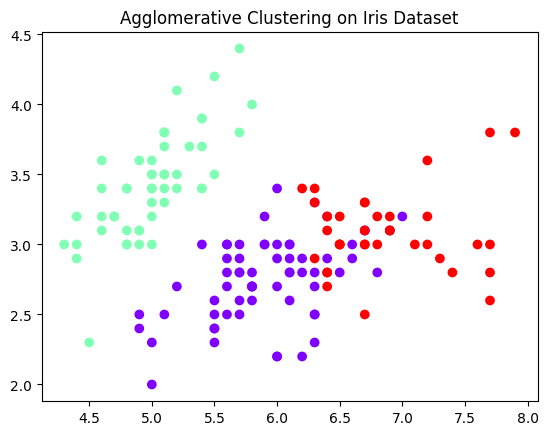

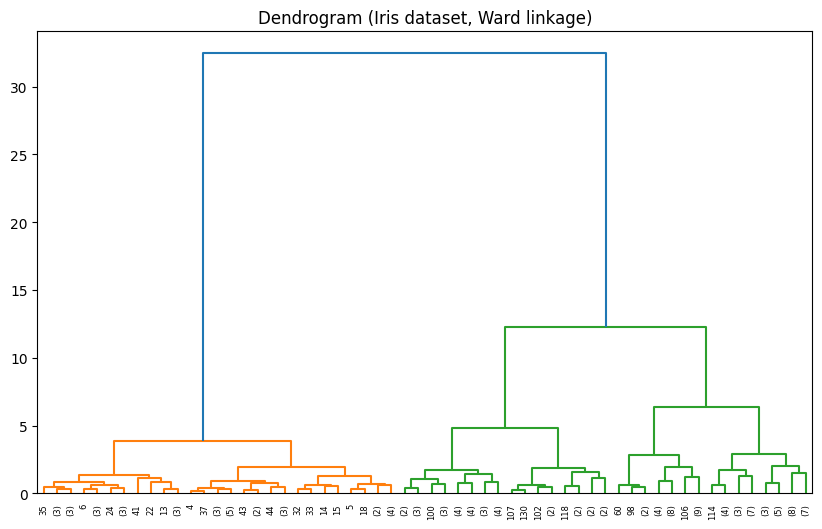

In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

model = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow")
plt.title("Agglomerative Clustering on Iris Dataset")
plt.show()

Z = linkage(X, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrogram (Iris dataset, Ward linkage)")
plt.show()